<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/After_asked_reviews_one_2022/I_Frannk/FixPop_CFrannk_F22_cec2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=1000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão
fator = 1.0/3.0; 
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.25;mut4=0.25;crossp4=0.25;
CR_interval = [0.5,0.8]
F_interval = [0.5,0.8]
mut_best  =0.5 ; crossp_best =0.5

In [ ]:
function_select = 'F22'
problem_size = 30 # possibles 2, 10, 20, 30, 50, 100

In [ ]:
'''
      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      X3,BEST3,FOBEST,XY,BEST_XY=Rand_DE.de(bounds,  F_interval , CR_interval, NPAR3, its,fobj,X3)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)
'''

'\n# Where you need to make changes in this code.... ps: if you search =cool= the code will find these lines !!    \n      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)\n      X3,BEST3,FOBEST,XY,BEST_XY=Rand_DE.de(bounds,  F_interval , CR_interval, NPAR3, its,fobj,X3)\n      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_best.de(bounds, mut_best ,crossp_best,NPAR4, its,fobj,X4)\n      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)\n'

In [ ]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann
import Rand_DE
import de_bounds_best
from pandas import read_csv

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 397 (delta 46), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (397/397), 335.23 KiB | 8.59 MiB/s, done.
Resolving deltas: 100% (227/227), done.
/content/optim_raianars_Insight


In [ ]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 272 (delta 82), reused 143 (delta 82), pack-reused 129
Receiving objects: 100% (272/272), 659.28 KiB | 11.37 MiB/s, done.
Resolving deltas: 100% (154/154), done.
/content/optim_raianars_Insight/Raianars_paper_One


In [ ]:
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [ ]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [ ]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 397 (delta 46), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (397/397), 335.23 KiB | 8.18 MiB/s, done.
Resolving deltas: 100% (227/227), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [ ]:
!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines

Cloning into 'Raianars_Routines'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 77 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (77/77), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines


In [ ]:
!git clone https://github.com/ucfilho/functions_cec2014_data
%cd functions_cec2014_data
import F1_to_F27_cec2014_zero_to_hero
import cec2014_names
import cec2014_shift_rotate

Cloning into 'functions_cec2014_data'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 300 (delta 182), reused 290 (delta 178), pack-reused 3
Receiving objects: 100% (300/300), 466.45 KiB | 5.13 MiB/s, done.
Resolving deltas: 100% (182/182), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data


In [ ]:
dim = problem_size 

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
# !gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
# https://drive.google.com/file/d/1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz/view?usp=sharing
!gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
To: /content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/cec2014.zip
100% 36.1M/36.1M [00:00<00:00, 244MB/s]


In [ ]:
import zipfile
file_name = zipfile.ZipFile('cec2014.zip', 'r')
file_name.extractall()

In [ ]:

Function_CEC2014 =function_select + "_" + cec2014_names.NamesFunctions()[function_select]+"_D_"+str(problem_size)

f_matrix = "M_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shift_data_file="shift_data_"+function_select[1:]+".txt"
shift_data = load_shift_data__(shift_data_file)[:problem_size]
matrix = load_matrix_data__(f_matrix)
f_shuffle = "shuffle_data_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shuffle = (load_shift_data__(f_shuffle)[:problem_size] - np.ones(problem_size)).astype(int)


f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
f10_katsuura__ = F1_to_F27_cec2014_zero_to_hero.f10_katsuura__ 
f11_happy_cat__ = F1_to_F27_cec2014_zero_to_hero.f11_happy_cat__
f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__
f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__
f5_ackley__ = F1_to_F27_cec2014_zero_to_hero.f5_ackley__

def F22(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
    problem_size = len(solution)
    p = np.array([0.1, 0.2, 0.2, 0.2, 0.3])
    n1 = int(np.ceil(p[0] * problem_size))
    n2 = int(np.ceil(p[1] * problem_size))
    n3 = int(np.ceil(p[2] * problem_size))
    n4 = int(np.ceil(p[3] * problem_size))

    idx1 = shuffle[:n1]
    idx2 = shuffle[n1:(n1 + n2)]
    idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
    idx4 = shuffle[(n1 + n2 + n3):(n1 + n2 + n3 + n4)]
    idx5 = shuffle[n1 + n2 + n3 + n4:]
    mz = np.dot(solution - shift_data, matrix)
    
    return f10_katsuura__(mz[idx1]) + f11_happy_cat__(mz[idx2]) + f13_expanded_griewank__(mz[idx3]) + \
           f9_modified_schwefel__(mz[idx4]) + f5_ackley__(mz[idx5]) #+ bias

In [ ]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [ ]:
Function = F22
fobj=Function
Fun = Function

In [ ]:
SUPPORT_DIMENSION = [2, 10, 20, 30, 50, 100]
SUPPORT_DIMENSION_2 = [10, 20, 30, 50, 100]

#def Fun(solution,shift_data=shift_data_a, matrix=matrix_a, shuffle):#, bias=F_bias):
def CEC2014(solution, shift_data ,  matrix, shuffle):#, bias=F_bias):
  if(type_fun == 'shift_rotate'):
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = Function(z) + F_bias
  elif(type_fun =='hybrid'): # F17 to F22
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = z + F_bias
 
  return result

In [ ]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 272 (delta 82), reused 143 (delta 82), pack-reused 129
Receiving objects: 100% (272/272), 659.28 KiB | 12.68 MiB/s, done.
Resolving deltas: 100% (154/154), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One


In [ ]:
MAX=np.repeat(100,dim)
MIN=np.repeat(-100,dim)

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [ ]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix


In [ ]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [ ]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [ ]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [ ]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [ ]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [ ]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [ ]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

#dimensions=len(MAX)
dimensions=dim
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim


MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]


In [ ]:
start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)


    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind, shift_data , matrix, shuffle) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo

    Fuma = f1_elliptic__  # Fuma era Fun
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fuma)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):

    ############################################################################################
    ############################################################################################
    ############################################################################################
    ############################################################################################
    ############################################################################################
    ##=cool=#####################################################################################
      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      # X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      X3,BEST3,FOBEST,XY,BEST_XY=Rand_DE.de(bounds,  F_interval , CR_interval, NPAR3, its,fobj,X3)
      # X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_best.de(bounds, mut_best ,crossp_best,NPAR4, its,fobj,X4)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)
    ############################################################################################
    ############################################################################################
    ############################################################################################
    ############################################################################################
    ############################################################################################
    ############################################################################################
      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;X1[1,:] = BEST3; X1[2,:] = BEST4;X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;X2[1,:] = BEST3;X2[2,:] = BEST4;X2[NPAR2-1,:] = BEST2;
      X3[0,:] = BEST1;X3[1,:] = BEST2;X3[2,:] = BEST4;X3[NPAR3-1,:] = BEST3;
      X4[0,:] = BEST1;X4[1,:] = BEST2;X4[2,:] = BEST3;X4[NPAR4-1,:] = BEST4;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 6.831217420101166 FO= 23.86163412236791
k= 1 time= 13.455066549777985 FO= 22.30272854669407
k= 2 time= 20.095485627651215 FO= 21.34244614798442
k= 3 time= 26.736916100978853 FO= 21.530322981641632
k= 4 time= 33.52500070730845 FO= 29.45485650674079
k= 5 time= 40.15426052411397 FO= 22.711151181052795
k= 6 time= 46.792809983094536 FO= 23.169496171498526
k= 7 time= 53.392079937458035 FO= 25.245978819912157
k= 8 time= 60.05308374961217 FO= 24.19157465753315
k= 9 time= 66.67004501422247 FO= 23.904728499867396
k= 10 time= 73.27963124116262 FO= 241.64701023593548
k= 11 time= 80.05700358549754 FO= 23.566838900517467
k= 12 time= 86.68724667628607 FO= 29.67568483698873
k= 13 time= 93.31094400087993 FO= 31.856196924658562
k= 14 time= 99.92478442192078 FO= 23.051185116709306
k= 15 time= 106.53054897785186 FO= 24.134443937798707
k= 16 time= 113.14758752584457 FO= 24.129212989727638
k= 17 time= 119.88626238107682 FO= 24.587451124170734
k= 18 time= 126.61893417835236 FO= 24.922943621531502


In [ ]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [ ]:
#pd.set_option('display.max_columns', 30)  
#print(df)

Text(0, 0.5, 'CR')

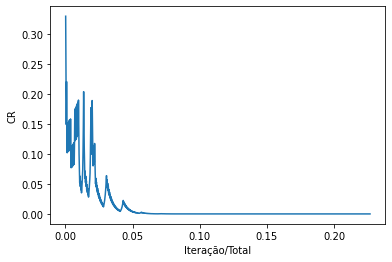

In [ ]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

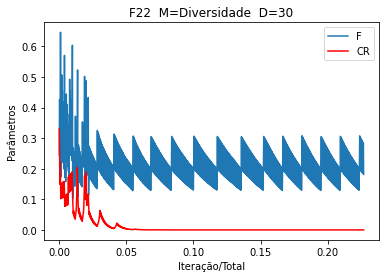

In [ ]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'F22_Diversidade_D=30')

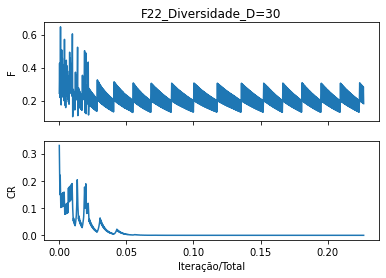

In [ ]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [ ]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

MCS-FRANNK Fator F/DE= 0.33 NPAR= 100 Iterações= 1000 Dim= 30 Min/Max= -100 / 100 _ F22
SUB_Fo-0.5_CRo-0.5_D-30_Interv-1000 

MÉDIA:  29.928184908040397 STD __: 30.506602110287254
MIN __: 21.34244614798442 MAX__:  241.64701023593548
29.928184908040397
30.506602110287254
21.34244614798442
Tempo Médio= 401.709 segundos ---
50 Rodadas

BEST:  [ 82.99583595  10.18133125 -32.12629944 -65.6703861   -3.05290975
  22.97025275  61.62613951 -13.25990212   4.36137645 -28.13916368
 -16.25767453 -41.69312342  16.6669146   11.95732687  23.98858994
  46.13447899 -74.83639429 -35.38881047  13.41479228  72.76400811
  -9.28353461 -22.87575261   7.53660364 100.          63.59579409
   6.47706016 -75.36468024  98.49738212   2.84048511 -71.28399503
  21.34244615]
